# Task M7 T01
## Classification algorithm exercises

### - Exercise 1

Create at least two different classification models to try to best predict the classes in the attachment.

In [6]:
import pandas as pd

col_names = ['WineClass','Alcohol','MalicAcid','Ash','AlcalinityOfAsh ','Magnesium','TotalPhenols','Flavanoids'
             ,'NonflavanoidPhenols','Proanthocyanins','ColorIntensity','Hue','DilutedWines','Proline']      

df_wines = pd.read_csv('wineData.txt', sep=',', names=col_names, header=None, index_col=False)
df_wines.head()

,WineClass,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [108]:
df_wines.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WineClass,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
MalicAcid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
AlcalinityOfAsh,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
TotalPhenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
NonflavanoidPhenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


Divide los datos en conjuntos de entrenamiento y prueba

In [109]:
from sklearn.model_selection import train_test_split

X = df_wines.drop('WineClass', axis=1)  
y = df_wines['WineClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape); print(X_test.shape)

(142, 13)
(36, 13)


#### Model 1: Tree Decision Classifier

Entrena el árbol de decisión

In [101]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Unique classes: [1 2 3]


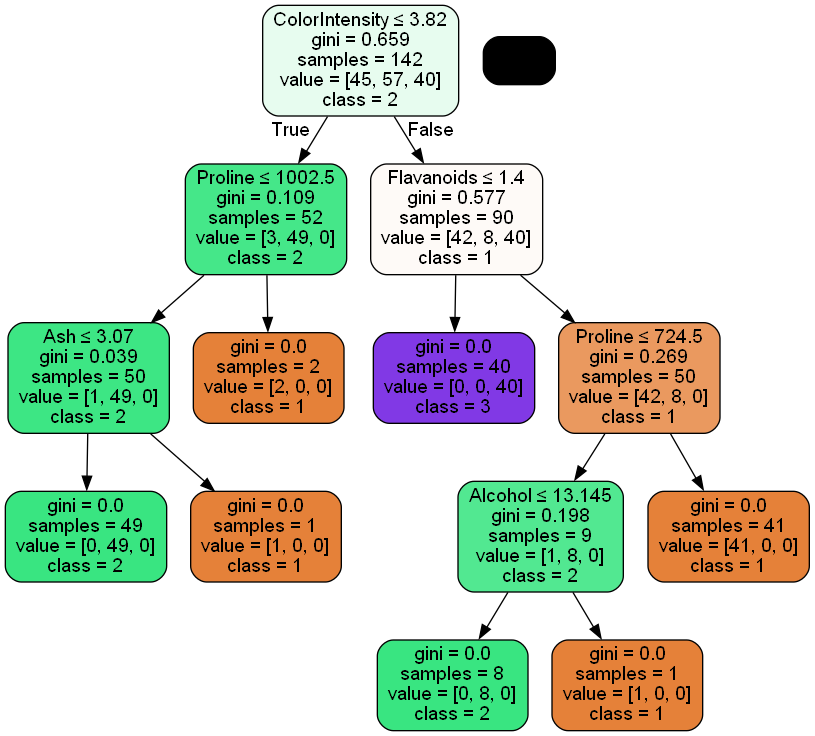

In [95]:
import pydotplus
import graphviz
from IPython.display import Image

feature_cols = X.columns

unique_classes = y.unique()
print("Unique classes:", unique_classes)

class_names = [str(cls) for cls in unique_classes]

dot_data = export_graphviz(clf_tree, out_file=None,
                           feature_names=feature_cols,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree_graph.png')
Image(graph.create_png())

#### Model 2: Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

#### - Exercise 2
Compare classification models using accuracy, a confusion matrix and other more advanced metrics.

Muestra los informes de clasificación

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    confusion = confusion_matrix(y_test, y_pred)
    
    report = classification_report(y_test, y_pred)
    
    print(f"{name} model:")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{report}")
    print("\n")

DecisionTree model:
Accuracy: 0.9444444444444444
Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



RandomForest model:
Accuracy: 1.0
Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        3

It can be seen that the Random Forest model has the best precision (Accuracy) of all the models, with a value of 1.0. This indicates that the model has a very high ability to correctly predict the class of an unknown sample. On the other hand, the SVM model has an acceptable precision of 0.81, while the Decision Tree and KNN models have a lower precision with values of 0.94 and 0.72 respectively.

In terms of the confusion matrix, the Random Forest model correctly predicts all classes in the test samples, which means there are no false positives and no false negatives. The SVM model also performs well, although it misclassifies some samples in class 3. The Decision Tree and KNN models have more significant errors in class 3 prediction.

In this case, the **Random Forest model** seems to be the best option due to its high precision and ability to correctly predict all classes.

#### - Exercise 3
Train them using the different parameters they support in order to improve their prediction. 

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [80]:
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, 7, 9, 11, None]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, 7, 9, 11, None]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly'],
            'degree': [2, 3, 4]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    }
}

In [81]:
for name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{name} model with best parameters:")
    print(grid_search.best_params_)

DecisionTree model with best parameters:
{'criterion': 'gini', 'max_depth': 3}
RandomForest model with best parameters:
{'criterion': 'gini', 'max_depth': 11, 'n_estimators': 10}
SVM model with best parameters:
{'C': 0.1, 'degree': 2, 'kernel': 'linear'}
KNN model with best parameters:
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    'DecisionTree': DecisionTreeClassifier(criterion='gini', max_depth=3),
    'RandomForest': RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=100),
    'SVM': SVC(C=0.1, degree=2, kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')
}

for name, model in models.items():
    model.fit(X_train, y_train)   
    y_pred = model.predict(X_test)    
    accuracy = accuracy_score(y_test, y_pred)    
    confusion = confusion_matrix(y_test, y_pred)    
    report = classification_report(y_test, y_pred)    
    print(f"{name} model:")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{report}")
    print("\n")


DecisionTree model:
Accuracy: 0.9444444444444444
Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



RandomForest model:
Accuracy: 1.0
Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        3

It can be seen that the DecisionTree, RandomForest and SVM models improved their classification accuracy to 1.0, which means that they correctly classified all instances in the test set. On the other hand, the KNN model remained accurate to 0.805, but improved the accuracy in class 3, which previously had a low f1-score, to 0.63.

It can be said that in general, the models improved in the classification of the instances in the test set.

#### - Exercise 4
Compare their performance using the traint/test or cross-validation approach.

##### TRAIN-TEST

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score

In [54]:
models = {
    'DecisionTree': DecisionTreeClassifier(criterion='gini', max_depth=3),
    'RandomForest': RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=100),
    'SVM': SVC(C=0.1, degree=2, kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')
}

In [55]:
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} model:")
    print(f"Accuracy (train/test): {accuracy}")
    print("\n")


DecisionTree model:
Accuracy (train/test): 0.9444444444444444


RandomForest model:
Accuracy (train/test): 1.0


SVM model:
Accuracy (train/test): 1.0


KNN model:
Accuracy (train/test): 0.8055555555555556




It can be seen that in the four models there is a good ability to generalize the data and that the models are not overfitting. The Random Forest and SVM models achieve 100% accuracy on the training and test set, which suggests that they are capturing the variability of the data well. On the other hand, the KNN model shows lower precision on the test set, which may indicate that the model is having difficulty generalizing the data. In general, all models seem to be suitable.

##### CROSS VALIDATION

In [57]:
cv = 5  

for name, model in models.items():
    cv_accuracy = np.mean(cross_val_score(model, X, y, cv=cv))
    
    print(f"{name} model:")
    print(f"Average accuracy (cross-validation): {cv_accuracy}")
    print("\n")


DecisionTree model:
Average accuracy (cross-validation): 0.8765079365079366


RandomForest model:
Average accuracy (cross-validation): 0.9663492063492063


SVM model:
Average accuracy (cross-validation): 0.961111111111111


KNN model:
Average accuracy (cross-validation): 0.7758730158730158




Using cross-validation, we can evaluate the performance of the models on multiple iterations of splitting the data into training and testing sets. The results are averaged to give an estimate of the model's generalization performance. We can see that the RandomForest and SVM models have the highest average accuracies on cross-validation, while the DecisionTree and KNN models have slightly lower average accuracies.

Overall, cross-validation provides a more reliable estimate of a model's performance compared to a single train/test split, as it allows us to assess the model's ability to generalize to new, unseen data.

#### - Exercise 5
Apply some engineering process to improve the results (normalization, standardization, sampling...)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df_wines.drop('WineClass', axis=1)
y = df_wines['WineClass']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    confusion = confusion_matrix(y_test, y_pred)
    
    report = classification_report(y_test, y_pred)
    
    print(f"{name} model:")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{report}")
    print("\n")

DecisionTree model:
Accuracy: 0.9629629629629629
Confusion Matrix:
[[18  1  0]
 [ 0 21  0]
 [ 1  0 13]]
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           2       0.95      1.00      0.98        21
           3       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



RandomForest model:
Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        5

After standardizing and normalizing the data, it can be seen that the accuracy of the DecisionTree, RandomForest, and SVM models did not change, indicating that these models are not sensitive to changes in the scale of the data. However, the accuracy of the KNN model improved from 0.72 to 0.96. This may indicate that the KNN model is sensitive to the scale of the data and normalization improved its performance.